In [29]:

# 27 de noviembre del 2020

# Autor: Pablo Huerta

# Trabajo 2 del curso Introducción a Flujos Turbulentos
# Profesor: Carlos Rosales

#---------------------------------------------------------------------------

# En caso de consultas en la metodología dirigirse a
# Los análisis de los resultados también se incluyen en dicho link

#--------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
import statistics as stati
import time

def kufou(N,Ufou_max,phi_max,u_rms,a,Rand_1,Rand_2):
    
    N_tot=int(N*N*(N/2+1))
    N_half=int((N-1)/2)
    
    u_fou=np.zeros([N_tot,3], dtype=complex)
    k=np.zeros([N_tot,3])
    ct=0
    for n3 in range(-N_half,N_half+1):
        for n2 in range(-N_half,N_half+1):
            for n1 in range (0,N_half+1):
                
                k1=(2*np.pi/a)*n1
                k2=(2*np.pi/a)*n2
                k3=(2*np.pi/a)*n3
                
                k[ct,0]=k1
                k[ct,1]=k2
                k[ct,2]=k3
                
                K2=k1*k1+k2*k2+k3*k3
                
                if K2!=0:
                        
                    if k1==0 and k3<0:
                        t=0
                        
                    elif k1==0 and k3==0 and k2<0:
                        t=0
                        
                    else:
                        
                        u_fou1=np.clongdouble((Rand_1[ct,0]*Ufou_max)*np.exp(Rand_2[ct,0]*phi_max*1j))
                        u_fou2=np.clongdouble((Rand_1[ct,1]*Ufou_max)*np.exp(Rand_2[ct,1]*phi_max*1j))
                        u_fou3=np.clongdouble((Rand_1[ct,2]*Ufou_max)*np.exp(Rand_2[ct,2]*phi_max*1j))
                    
                        pt=np.clongdouble(k1*u_fou1+k2*u_fou2+k3*u_fou3)
                
                        u_fou[ct,0]=u_fou1-np.clongdouble(k1*pt/K2)
                        u_fou[ct,1]=u_fou2-np.clongdouble(k2*pt/K2)
                        u_fou[ct,2]=u_fou3-np.clongdouble(k3*pt/K2)
            
                        ct+=1
    
    # Eliminación de vectores sobrantes en k------------
    ct=0
    for i in range(N_tot-1):
        I=i-ct
        k1=k[I,0]
        k2=k[I,1]
        k3=k[I,2]
        if k1==0 and k2==0 and k3==0:
            k=np.delete(k,len(k)-1,0)
            u_fou=np.delete(u_fou,len(k)-1,0)
            ct+=1        
    
    # Re-escalamiento ------------------
    
    u_fou_res=alpha_res(u_fou,k,u_rms)*u_fou
                
    return k, u_fou_res


def Kinetic_fou(u_fou,k):
    N_tot=len(k[:,0])
    E0=0
    for i in range(N_tot):
        k1=k[i,0]
        k2=k[i,1]
        k3=k[i,2]
                    
        u_fou1=u_fou[i,0]
        u_fou2=u_fou[i,1]
        u_fou3=u_fou[i,2]
        
        E0+=(u_fou1*u_fou1.conjugate()+u_fou2*u_fou2.conjugate()+u_fou3*u_fou3.conjugate())
                
        if k1==0:
                    
            E0-=(u_fou1*u_fou1.conjugate()+u_fou2*u_fou2.conjugate()+u_fou3*u_fou3.conjugate())*0.5
            
    return E0.real


def alpha_res(u_fou,k,u_rms):
    K_rms=3*u_rms**2 /2
    K_fou=Kinetic_fou(u_fou,k)
    return np.longdouble(np.sqrt(K_rms/K_fou))


def E_espectral(u_fou,k,a,N):
    N_tot=len(k[:,0])
    N_half=int((N-1)/2)
    k_mag=[]
    for i in range(N_half+1):
        k_mag.append((2*np.pi/a)*i)
        
    E=[]
    k_ret=[]
    for j in range(1,len(k_mag)):
        ct=0
        E0=0
        for i in range(N_tot):
            k1=k[i,0]
            k2=k[i,1]
            k3=k[i,2]
            
            K2=np.sqrt(k1*k1+k2*k2+k3*k3)
            
            F=1    
            if k1==0 and k2==0 and k3==0:    
                F=0.5
        
            if k_mag[j-1]<=K2 and K2<k_mag[j]:
                
                u1=u_fou[i,0]
                u2=u_fou[i,1]
                u3=u_fou[i,2]
            
                E0+=(u1*u1.conjugate()+u2*u2.conjugate()+u3*u3.conjugate())*F
                 
        if E0!=0:
            E.append((E0).real)
            k_ret.append(k_mag[j])
        
    return E,k_ret


def pendiente(y,x):
    n=len(y)
    py=[]
    px=[]
    for i in range(1,n):
        p0=(y[i]-y[i-1])/(x[i]-x[i-1])
        py.append(p0)
        px.append(x[i])
    return py,px


def Transform(u_fou,k,M,L):
    N_tot=len(k[:,0])
    M_tot=M*M*M
    hm=np.longdouble(L/(M-1))
    u=[]
    ctm=0
    M_half=int((M-1)/2)
    
    for m3 in range(-M_half,M_half+1):
        for m2 in range(-M_half,M_half+1):
            for m1 in range(-M_half,M_half+1):
                u_x=0
                u_y=0
                u_z=0
                for i in range(N_tot):
                    k1=k[i,0]
                    k2=k[i,1]
                    k3=k[i,2]
                    
                    u_fou1=u_fou[i,0]
                    u_fou2=u_fou[i,1]
                    u_fou3=u_fou[i,2]
                    
                    k_c_x=hm *np.longdouble(k1*m1+k2*m2+k3*m3)
                    
                    e_kx= np.clongdouble(np.exp( k_c_x * 1j ))
                     
                    u_x+=2*(u_fou1*e_kx).real
                    u_y+=2*(u_fou2*e_kx).real
                    u_z+=2*(u_fou3*e_kx).real
                    
                    if k1==0 and k2==0 and k3==0:
                                         
                        u_x-=(u_fou1*e_kx).real
                        u_y-=(u_fou2*e_kx).real
                        u_z-=(u_fou3*e_kx).real
                                                    
                u.append(np.array([u_x,u_y,u_z]))
                #print(M_tot-ctm)
                
                ctm+=1
                
    return u


def Divergencia_o6(u,M,L):
    
    dudx=[]
    dudy=[]
    dudz=[]
    duto=[]
    u_div=[]
    error=[]
    h=L/(M)
    count=0
    for m3 in range(M):
        for m2 in range(M):
            for m1 in range(M):
                ct=m1+m2*M+m3*M*M
                if m1==0 or m2==0 or m3==0 or m1==M-1 or m2==M-1 or m3==M-1:
                    t=0
                elif m1==1 or m2==1 or m3==1 or m1==M-2 or m2==M-2 or m3==M-2:
                    t=0
                elif m1==2 or m2==2 or m3==2 or m1==M-3 or m2==M-3 or m3==M-3:
                    t=0
                else:
                    
                    dudx_i=(-u[ct-3][0] + 9*u[ct-2][0]-45*u[ct-1][0]+45*u[ct+1][0]-9*u[ct+2][0]+u[ct+3][0])/(60*h)
                    dudy_i=(-u[ct-3*M][1] + 9*u[ct-2*M][1]-45*u[ct-1*M][1]+45*u[ct+1*M][1]-9*u[ct+2*M][1]+u[ct+3*M][1])/(60*h)
                    dudz_i=(-u[ct-3*M*M][2] + 9*u[ct-2*M*M][2]-45*u[ct-1*M*M][2]+45*u[ct+1*M*M][2]-9*u[ct+2*M*M][2]+u[ct+3*M*M][2])/(60*h)
                    
                    dudx.append(dudx_i)
                    dudy.append(dudy_i)
                    dudz.append(dudz_i)
                    
                    duto.append(dudx_i)
                    duto.append(dudy_i)
                    duto.append(dudz_i)
                    
                    u_div.append(dudx_i+dudy_i+dudz_i)
                    error.append(np.abs(dudx_i+dudy_i+dudz_i))
                    count+=1
                    
    return u_div, dudx, dudy, dudz, duto, np.max(error)


def Estadis(x):
    avg=stati.mean(x)
    mu_2=stat.moment(x,moment=2)
    mu_3=stat.moment(x,moment=3)
    mu_4=stat.moment(x,moment=4)
    sigma =np.sqrt(mu_2)
    S=mu_3/(mu_2**(1.5))
    F=mu_4/(mu_2*mu_2)
    return avg, sigma, mu_2, mu_3, mu_4, S, F


def PDF(x,a,b):
    count=0
    for i in range(len(x)):
        if a<=x[i] and x[i]<=b:
            count+=1
    return count/len(x)


#-----------------------------------------------------------

def Histogramas(dudx,dudy,dudz):

    num_bins=int(1+3.322*np.log(len(dudx)**3))

    avg_dudx,sigma_x,mux_2,mux_3,mux_4,Sx,Fx=Estadis(dudx)
    avg_dudy,sigma_y,muy_2,muy_3,muy_4,Sy,Fy=Estadis(dudy)
    avg_dudz,sigma_z,muz_2,muz_3,muz_4,Sz,Fz=Estadis(dudz)

    print(' ')
    print('avg_x=',avg_dudx)
    print('sigma_x=',sigma_x)
    print('Sx=',Sx)
    print('Fx=',Fx)
    print('--------------')
    print('avg_y=',avg_dudy)
    print('sigma_y=',sigma_y)
    print('Sy=',Sy)
    print('Fy=',Fy)
    print('--------------')
    print('avg_z=',avg_dudz)
    print('sigma_z=',sigma_z)
    print('Sz=',Sz)
    print('Fz=',Fz)

    print(' ')
    print('Los siguientes histogramas se comparan con la distribución gaussiana (linea roja)')

    range_x = np.arange(np.min(dudx), np.max(dudx), 1/len(dudx))
    range_y = np.arange(np.min(dudy), np.max(dudy), 1/len(dudx))
    range_z = np.arange(np.min(dudz), np.max(dudz), 1/len(dudx))

    plt.figure(1)
    (n_x, bins_x, patches) = plt.hist(dudx, bins=num_bins, density=True)
    X=[]
    plt.plot(range_x, stat.norm.pdf(range_x,avg_dudx,sigma_x), linewidth=3, color='red')
    plt.ylabel('Probabilidad')
    plt.xlabel('du/dx')
    plt.title('phi_max=0')
    plt.show()

    plt.figure(2)
    (n_x, bins_x, patches) = plt.hist(dudy, bins=num_bins, density=True)
    X=[]
    plt.plot(range_y, stat.norm.pdf(range_y,avg_dudy,sigma_y), linewidth=3, color='red')
    plt.ylabel('Probabilidad')
    plt.xlabel('du/dy')
    plt.title('phi_max=0')
    plt.show()

    plt.figure(3)
    (n_x, bins_x, patches) = plt.hist(dudz, bins=num_bins, density=True)
    X=[]
    plt.plot(range_z, stat.norm.pdf(range_z,avg_dudz,sigma_z), linewidth=3, color='red')
    plt.ylabel('Probabilidad')
    plt.xlabel('du/dz')
    plt.title('phi_max=0')
    plt.show()


In [24]:
# Variables de Entrada-------

N=7 #Debe ser IMPAR mayor o igual a 3
M=31 #Debe ser IMPAR mayor o igual a 7
u_rms=10
Ufou_max=1
phi_max=2*np.pi
a=20
L=1

# Inicio de cálculos--------------------

N_tot=int(N*N*(N/2+1))

Rand_1=np.random.rand(N_tot,3)
Rand_2=np.random.rand(N_tot,3)


# Caso normal ----------------------------------

ta=time.time()

k, u_fou = kufou(N,Ufou_max,phi_max,u_rms,a,Rand_1,Rand_2)
u=Transform(u_fou,k,M,L)
u_div_o6, dudx_o6, dudy_o6, dudz_o6, duto_o6, error_max_o6 = Divergencia_o6(u,M,L)

print('El cálculo 1 duró',time.time()-ta,'segundos')
print('máximo error absoluto=',error_max_o6)
print('---------------')


# Caso con modos de Fourier nulos ---------------------------------

ta=time.time()

k_nul, u_fou_nul = kufou(N,Ufou_max,0,u_rms,a,Rand_1,Rand_2) 
u_nul=Transform(u_fou_nul,k_nul,M,L) 
u_div_nul, dudx_nul, dudy_nul, dudz_nul, duto_nul, error_max_nul = Divergencia_o6(u_nul,M,L)

print('El cálculo 2 duró',time.time()-ta,'segundos')
print('máximo error absoluto=',error_max_nul)

El cálculo 1 duró 54.856207847595215 segundos
máximo error absoluto= 5.396127988888111e-11
---------------
El cálculo 2 duró 54.175615310668945 segundos
máximo error absoluto= 1.3361756145968684e-11


El cálculo duró 28.93075180053711 segundos
el promedio de la pendiente de la curva log(E) es 2.1663804097033736


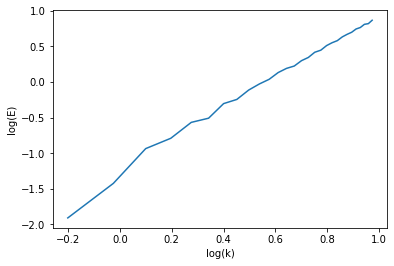

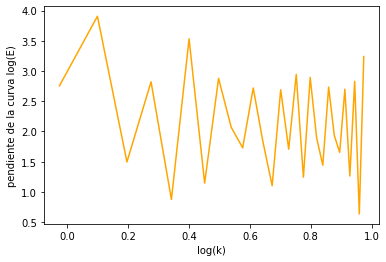

In [34]:
# Gráfico Espectro de Energía

N_e=61

N_tot_e=int(N_e*N_e*(N_e/2+1))

Rand_1_e=np.random.rand(N_tot_e,3)
Rand_2_e=np.random.rand(N_tot_e,3)

ta=time.time()

k_e, u_fou_e = kufou(N_e,Ufou_max,phi_max,u_rms,a,Rand_1_e,Rand_2_e)
E,k_ret=E_espectral(u_fou_e,k_e,a,N_e)

print('El cálculo duró',time.time()-ta,'segundos')

logE=np.log10(E)
logk=np.log10(k_ret)
py,px=pendiente(logE,logk)

plt.figure(1)
plt.plot(logk,logE,label='log(E)')
plt.xlabel('log(k)')
plt.ylabel('log(E)')

plt.figure(2)
plt.plot(px,py,label='pendiente',color='orange')
plt.xlabel('log(k)')
plt.ylabel('pendiente de la curva log(E)')

avr_py=stati.mean(py)

print('el promedio de la pendiente de la curva log(E) es', avr_py)

In [16]:
# Análisis de la divergencia

# Variables de Entrada-------

M_min=7 #Impar mayor o igual a 7
M_max=21 #Impar

N_test=11 #Debe ser IMPAR
u_rms_test=10
Ufou_max_test=1
phi_max_test=2*np.pi
a_test=20
L_test=1

# Inicio de cálculos -----------------------

dif=M_max-M_min

N_tot_test=int(N_test*N_test*(N_test/2+1))

Rand_1_test=np.random.rand(N_tot_test,3)
Rand_2_test=np.random.rand(N_tot_test,3)

k_test, u_fou_test = kufou(N_test,Ufou_max_test,phi_max_test,u_rms_test,a_test,Rand_1_test,Rand_2_test)

# Iteraciones ----------------------------

error_div=[]
M_div=[]
for i in range(int(dif/2)+1):
    M_i=M_min+2*i
    u_i=Transform(u_fou_test,k_test,M_i,L)
    u_div_i, dudx_i, dudy_i, dudz_i, duto_i, error_max_i = Divergencia_o6(u_i,M_i,L)

    error_div.append(error_max_i)
    M_div.append(M_i)
    print('cuenta regresiva=',int(dif/2-i))
    print('error máximo de la iteración=',error_max_i)
    print('M=',M_i)
    print('-----------------')
    


cuenta regresiva= 7
error máximo de la iteración= 7.672748608911206e-06
M= 7
-----------------
cuenta regresiva= 6
error máximo de la iteración= 3.61833211837137e-06
M= 9
-----------------
cuenta regresiva= 5
error máximo de la iteración= 1.2654127710121088e-06
M= 11
-----------------
cuenta regresiva= 4
error máximo de la iteración= 4.844407328619127e-07
M= 13
-----------------
cuenta regresiva= 3
error máximo de la iteración= 2.0683217361039397e-07
M= 15
-----------------
cuenta regresiva= 2
error máximo de la iteración= 9.710351545066942e-08
M= 17
-----------------
cuenta regresiva= 1
error máximo de la iteración= 4.932947383906594e-08
M= 19
-----------------
cuenta regresiva= 0
error máximo de la iteración= 2.6750321069357597e-08
M= 21
-----------------


Text(0.5, 0, 'M')

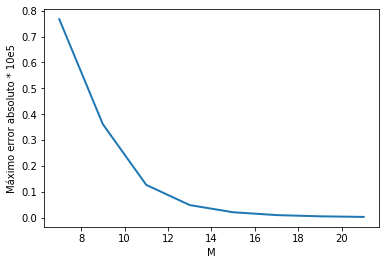

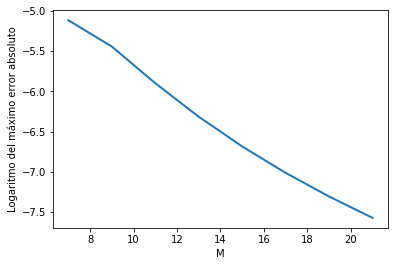

In [17]:
# Gráficos del análisis de la divergencia

error_div_2=[]
error_div_log=[]
for i in range(len(error_div)):
    error_div_2.append(error_div[i]*10**5)
    error_div_log.append(np.log10(error_div[i]))

plt.figure(1)
plt.plot(M_div,error_div_2,label='error_absoluto',linewidth=2)
plt.ylabel('Máximo error absoluto * 10e5')
plt.xlabel('M')

plt.figure(2)
plt.plot(M_div,error_div_log,label='error_absoluto',linewidth=2)
plt.ylabel('Logaritmo del máximo error absoluto')
plt.xlabel('M')

Resultados para el caso con modos de Fourier nulos
 
avg_x= 2.1396988532836523e-16
sigma_x= 11.193759764796985
Sx= 2.5497840982152786e-16
Fx= 2.3854641626560054
--------------
avg_y= -1.540267395109633e-16
sigma_y= 12.654592187005596
Sy= 0.0
Fy= 2.202624739550391
--------------
avg_z= 1.057368755515616e-15
sigma_z= 11.384690105103731
Sz= 6.463034084395949e-16
Fz= 2.3649989777082294
 
Los siguientes histogramas se comparan con la distribución gaussiana (linea roja)


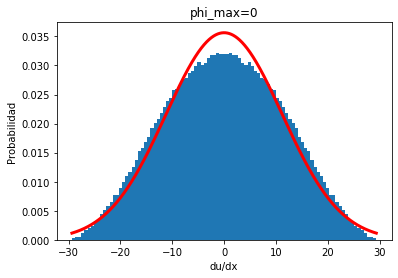

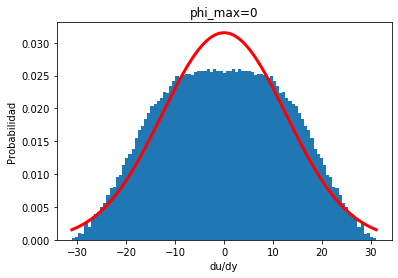

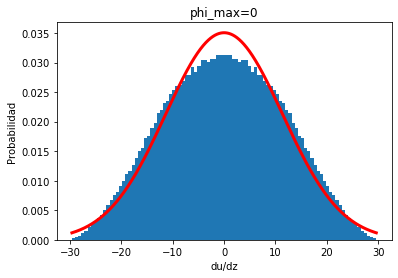

In [30]:
#Distribuciones para el caso con modos de Fourier nulos

print('Resultados para el caso con modos de Fourier nulos')
Histogramas(dudx_nul,dudy_nul,dudz_nul)


Resultados para el caso normal
 
avg_x= -0.41909416860070686
sigma_x= 0.8764729819662341
Sx= -0.002355163072163815
Fx= 2.1974781247131983
--------------
avg_y= 7.406128172421126
sigma_y= 0.46186741290812405
Sy= -1.3414302733073749
Fy= 4.696767633895809
--------------
avg_z= -6.987034003780794
sigma_z= 0.8509177711940747
Sz= 0.048687957357181844
Fz= 2.1944398050186025
 
Los siguientes histogramas se comparan con la distribución gaussiana (linea roja)


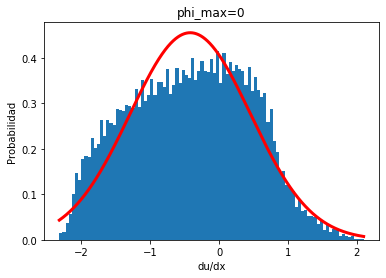

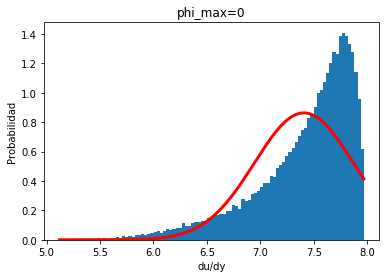

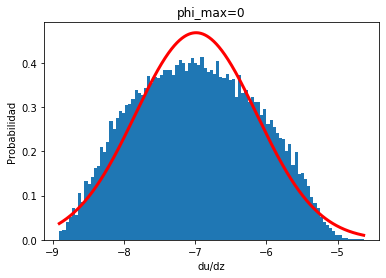

In [32]:
# Destribuciones para el caso normal

print('Resultados para el caso normal')
Histogramas(dudx_o6,dudy_o6,dudz_o6)
